In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
incomes = np.random.normal(100, 20, 10000)

pyplot.hist(incomes, 100)
pyplot.show()

<Figure size 640x480 with 1 Axes>

In [7]:
incomes.std()


19.91132660275997

In [8]:
incomes.var()

396.4609270817769

In [3]:
df = pd.read_csv("party_in_nyc.csv")
df.head(10)

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516
5,2015-12-31 00:08:05,2015-12-31 01:59:12,Residential Building/House,10467.0,BRONX,BRONX,40.858748,-73.865625
6,2015-12-31 00:11:40,2015-12-31 06:24:00,Residential Building/House,11230.0,BROOKLYN,BROOKLYN,40.617005,-73.956920
7,2015-12-31 00:12:13,2015-12-31 00:38:09,Residential Building/House,11215.0,BROOKLYN,BROOKLYN,40.665051,-73.981278
8,2015-12-31 00:12:37,2015-12-31 05:03:39,Residential Building/House,10463.0,BRONX,BRONX,40.875895,-73.912471
9,2015-12-31 00:14:13,2015-12-31 06:25:40,Store/Commercial,11372.0,JACKSON HEIGHTS,QUEENS,40.755584,-73.885201


In [6]:
party_per_borough = df['Borough'].value_counts()
party_per_borough

BROOKLYN         68905
MANHATTAN        64172
BRONX            47672
QUEENS           38274
STATEN ISLAND     5411
Unspecified        980
Name: Borough, dtype: int64

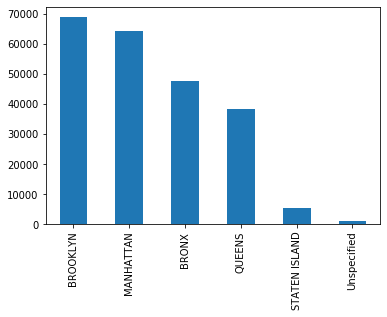

In [7]:
party_per_borough.plot(kind='bar')